In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image, ImageDraw,ImageFont
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# Face Shape Classifier For Hairstyle Recommendation

With this project, I will attempt to address the challenge by developing a hairstyle recommendation system that identifies the user’s face shape and recommends the most flattering hair style. My approach will be to first build a facial classifier that will determine whether the user’s face is long, round, oval, heart- or square-shaped.  Based on the classification, the model will recommend appealing hairstyles. The recommendation system will continually update utilizing user input on their most and least desired hair styles.  

Initially, I am focusing on women's faces and hair styles, although this concept applies to men too.  Face shape is often used to help women determine how to style their hair, choose their eye glasses and apply their make up.  Face shape detection is subjective and this project attempts to provide a more quantitative approach.
Below are the examples of each five main face shapes:

As you can observe that the face shape do differ in structure in various ways:

1. The heart-shaped face is characterized by wider cheekbones that tapers down to a narrow chin.
2. The long face is, well, long and very narrow.
3. The oval face is similar to the long face but fuller than the long face.
4. The round face is distinct, it's a much shorter and wider shape.
5. The square-shape face is charcterized by a strong jaw.

In [16]:
df = pd.DataFrame(columns = ['0','1','2','3','4','5','6','7','8','9','10','11',	'12',	'13',	'14',	'15',	'16','17',
                             '18',	'19',	'20',	'21',	'22',	'23',	'24','25',	'26',	'27',	'28',	'29',
                             '30',	'31',	'32',	'33',	'34',	'35',	'36',	'37',	'38',	'39',	'40',	'41',
                             '42',	'43',	'44',	'45',	'46',	'47',	'48',	'49',	'50',	'51',	'52',	'53',
                             '54',	'55',	'56',	'57',	'58',	'59',	'60',	'61',	'62',	'63',	'64',	'65',
                             '66',	'67',	'68',	'69',	'70',	'71',	'72',	'73',	'74',	'75',	'76',	'77',
                             '78',	'79',	'80',	'81',	'82',	'83',	'84',	'85',	'86',	'87',	'88',	'89',
                             '90',	'91',	'92',	'93',	'94',	'95',	'96',	'97',	'98',	'99',	'100',	'101',
                             '102',	'103',	'104',	'105',	'106',	'107',	'108',	'109',	'110',	'111',	'112',	'113',
                             '114',	'115',	'116',	'117',	'118',	'119',	'120',	'121',	'122',	'123',	'124',	'125',
                             '126',	'127',	'128',	'129',	'130',	'131',	'132',	'133',	'134',	'135',	'136',	'137',
                             '138',	'139',	'140',	'141',	'142',	'143','A1','A2','A3','A4','A5','A6','A7','A8','A9',
                            'A10','A11','A12','A13','A14','A15','A16','Width','Height','H_W_Ratio','Jaw_width','J_F_Ratio',
                             'MJ_width','MJ_J_width'])

In [17]:
%run -i functions_only.py    # This calls my main functions (make_face_df, Distance, ScaleRotateTranslate)

<Figure size 640x480 with 0 Axes>

In [18]:
%run -i functions_only_save.py    # This calls my 2nd function for Recommendation Purpose

In [19]:
# load data file
# start here
data = pd.read_csv('all_features.csv',index_col = None)
data = data.drop('Unnamed: 0',axis = 1)
data.shape

(1524, 170)

# Data Visualizations

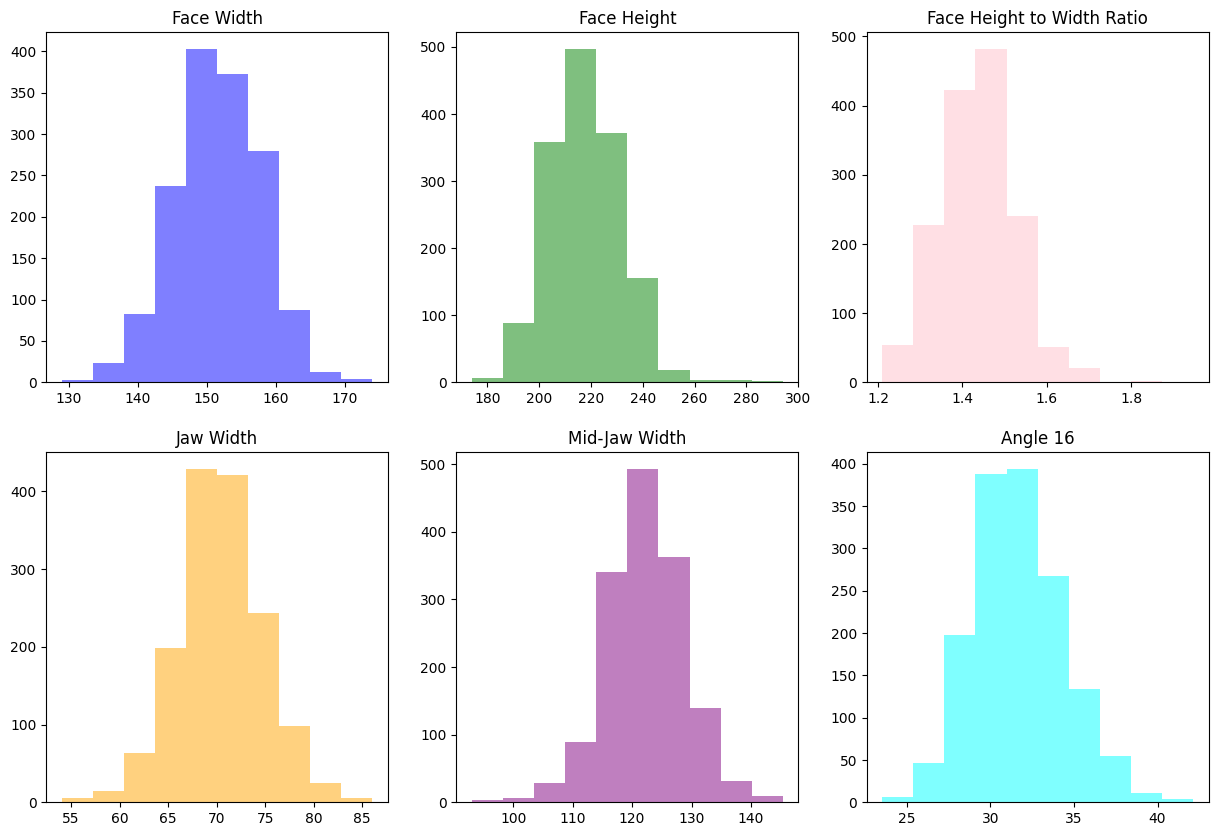

In [20]:
xclean = data.dropna(axis=0, how='any')
plt.figure(figsize=(15,10)) 

plt.subplot(2,3,1)
plt.hist(xclean['Width'], 10, facecolor='blue', alpha=0.5)
plt.title('Face Width')

plt.subplot(2,3,2)
plt.hist(xclean['Height'], 10, facecolor='green', alpha=0.5)
plt.title('Face Height')

plt.subplot(2,3,3)
plt.hist(xclean['H_W_Ratio'], 10, facecolor='pink', alpha=0.5)
plt.title('Face Height to Width Ratio')

plt.subplot(2,3,4)
plt.hist(xclean['Jaw_width'], 10, facecolor='orange', alpha=0.5)
plt.title('Jaw Width')

plt.subplot(2,3,5)
plt.hist(xclean['MJ_width'], 10, facecolor='purple', alpha=0.5)
plt.title('Mid-Jaw Width')

plt.subplot(2,3,6)
plt.hist(xclean['A16'], 10, facecolor='aqua', alpha=0.5)
plt.title('Angle 16')

plt.show()

The attributes here appear to be normally distributed. Now I want to look at the distribution by face shape and what may make them different.

In [21]:
from scipy import stats

S1 = []
S2 = []
S1S2 = []
p_value = []
t_tests = pd.DataFrame() 
labels = ['heart','long','oval','round','square']
for i in range(0,4):
    for j in range(0,4):
        t = (stats.ttest_ind(xclean[xclean.classified_shape == labels[i] ].Width, xclean[xclean.classified_shape == labels[j+1]].Width))
        p_value.append(t.pvalue)
        S1.append(labels[i])
        S2.append(labels[j+1])   
t_tests['S1'] = S1
t_tests['S2'] = S2
t_tests["test"] = t_tests["S1"].map(str) + ':' + t_tests["S2"]
t_tests['p_value'] = p_value

t_tests = t_tests[t_tests.S1 != t_tests.S2]

In [22]:
def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'green' if val < 0.05 else 'black'
    return 'color: %s' % color

s = t_tests.style.applymap(color_negative_red,subset=pd.IndexSlice[:, ['p_value']])
s

Based on these t-test p-values, we can reject the null hypothesis for the pairs in green font (using p < 0.05):

1. Heart & Long faces
2. Heart & Round faces
3. Long & Oval faces
4. Long & Round faces
5. Long & Square faces
6. Oval & Round faces
7. Oval & Square faces
8. Round & Square faces

We cannot reject the null hypothesis for Heart & Oval (p value = 0.32) and Heart & Square (p value = 0.31)

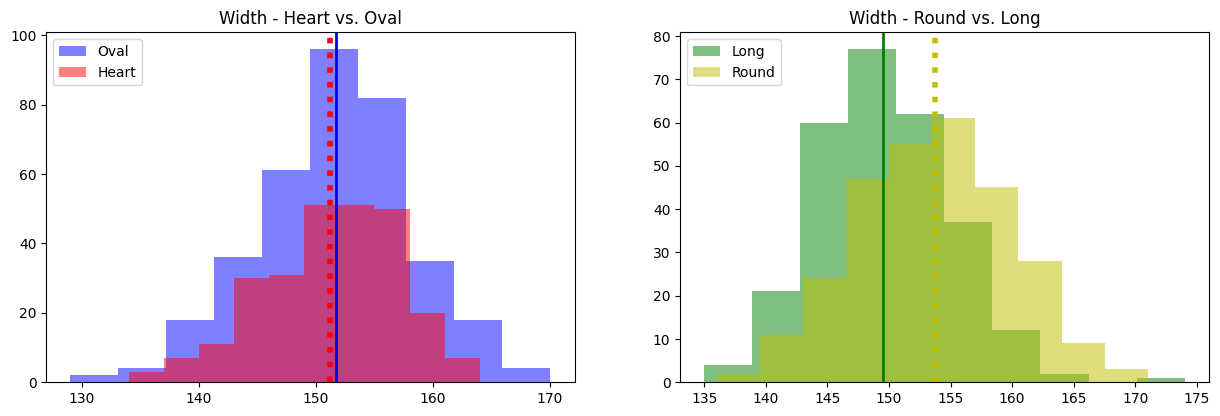

In [23]:
# Face width histograms; purposely normed because of varying sample sizes.

HW = xclean[xclean['classified_shape']=="heart"]
OW = xclean[xclean['classified_shape']=="oval"]
LW = xclean[xclean['classified_shape']=="long"]
RW = xclean[xclean['classified_shape']=="round"]

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.hist(OW['Width'],label = 'Oval',alpha = 0.5, color = 'b')
plt.hist(HW['Width'],label = 'Heart',alpha = 0.5, color = 'r')
plt.axvline(OW['Width'].mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(HW['Width'].mean(), color='r', linestyle='dotted', linewidth=4)
plt.title('Width - Heart vs. Oval')
plt.legend(loc='upper left')

plt.subplot(2,2,2)
plt.hist(LW['Width'],label = 'Long',alpha = 0.5, color = 'g')
plt.hist(RW['Width'],label = 'Round',alpha = 0.5, color = 'y')
plt.axvline(LW['Width'].mean(), color='g', linestyle='solid', linewidth=2)
plt.axvline(RW['Width'].mean(), color='y', linestyle='dotted', linewidth=4)
plt.legend(loc='upper left')
plt.title('Width - Round vs. Long')

plt.show()

In the first graph where the p >= 0.05, you can see how close the means are for oval- and heart-shaped faces' width and their distributions overlap significantly. On the right hand, the width for long and round faces are signficantly different and the mean for round is much higher and the entire distribution is shifted towards wider face dimensions.

### Box Plots

To visualize all of these comparisons for several metrics would be pretty cluttered, therfore box plots allow you to quickly review the distributions, means and medians for key features from the dataset.

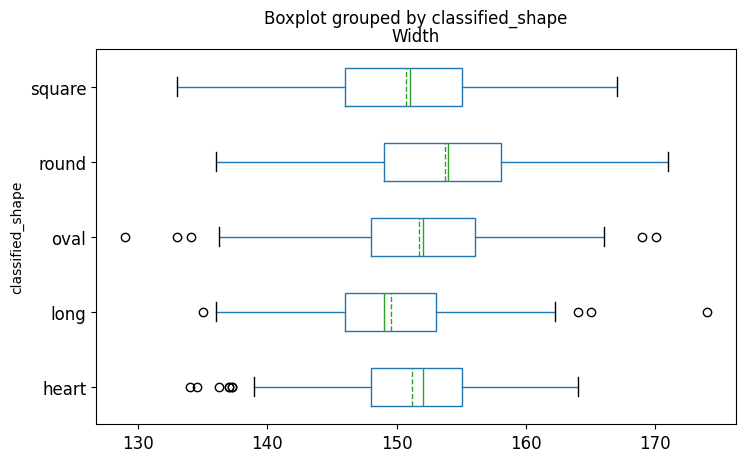

In [24]:
data.boxplot(column='Width', by='classified_shape',vert=False, ax=None, fontsize=12, rot=0, grid=False, figsize=(8,5), 
             meanline = True, showmeans = True,
                  layout=None, return_type=None)
plt.show()

Above, you will observe a graph that provides the median (solid line), mean (dotted), quartiles and range of the facial widths by facial shape.  As expected, round faces have the largest facial width median, mean and max. Long faces are characterized by having the most narrow face. Just like the histogram above demonstrates, heart & oval are very similar while long and round are the most different.

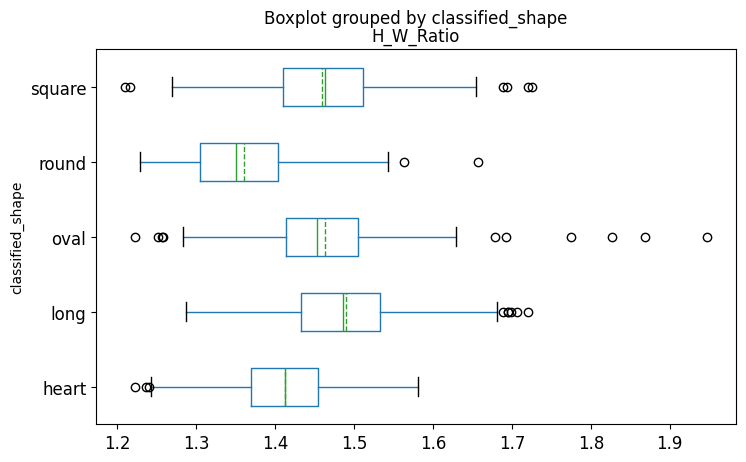

In [25]:
# H_W_Ratio

data.boxplot(column='H_W_Ratio', by='classified_shape',vert=False, ax=None, fontsize=12, rot=0, grid=False, figsize=(8,5), 
                  layout=None, return_type=None, meanline = True, showmeans = True)
plt.show()

The box plot above illustrates the face height to width ratio.  The round face shape has the lowest height to width ratio which aligns with expectations. The oval face has the most variability for the height to width ratio attribute.

For width, the heart and oval were very similar, but you can see that for the ratio of height to width, the heart- and oval-shaped faces begin to differentiate.  Oval-shaped faces have a higher height to width ratio than heart (i.e., they are longer than heart-shaped faces).

Based on my observation, face shapes really begin to vary near the mouth/chin.  Therefore, I calculated two new features regarding the width of the jaw at different locations.
The Jaw Width is defined as the distance between points 7 and 11. The Mid-jaw width is defined as the distance between the 5 and 13 points. I then calculated the ratio of those two widths.

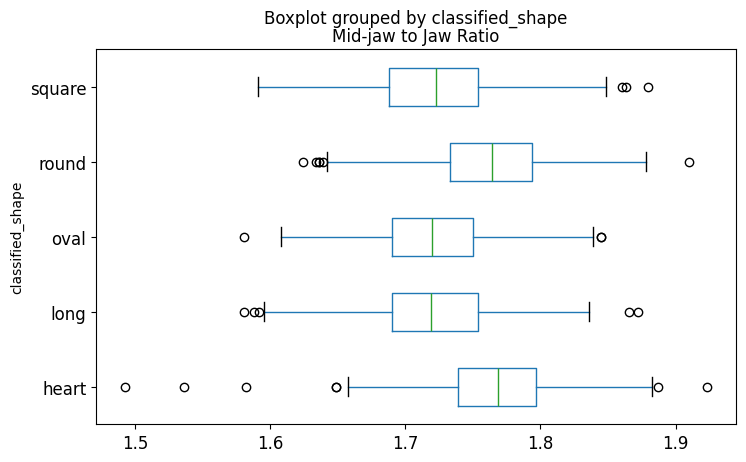

In [26]:
data.boxplot(column='MJ_J_width', by='classified_shape',vert=False, ax=None, fontsize=12, rot=0, grid=False, figsize=(8,5), 
                  layout=None, return_type=None)
plt.title('Mid-jaw to Jaw Ratio')
plt.show()

This ratio allows us to observe the narrowing between the mid jaw and jaw for the heart shaped faces, evidenced by the higher ratio.  Once again, you can see that heart and oval differ.  Heart-shaped faces are characterized by narrow chins which means that the mid-jaw to jaw ratio is higher (i.e., the mid-jaw is proportionally larger vs. the lower jaw/chin area). 

In [27]:
! pip install opencv-python

# Evaluate models

## Modeling Pipeline

Firstly, I started to build my model with capturing the data as described above, then I scaled the data by removing the mean and scaling to unit variance.  This is performed so that each feature contributes approximately proportionately to the model. I attempted to extract features using PCA but that process did not significantly improve the speed and/or results of my models. Although PCA was able to slightly improve overfitting.

The scaled inputs were split into train/test and then proessed through the models below.

## Supervised Learning - the chosen model

### Set up Test/Train for supervised learning

In [28]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import ensemble
from sklearn import linear_model
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler  
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.decomposition import PCA 

In [29]:
data_clean = data.dropna(axis=0, how='any')
X = data_clean
X = X.drop(['filenum','filename','classified_shape'] , axis = 1)
X_norm = normalize(X)
Y = data_clean['classified_shape']

### Standardize features by removing the mean and scaling to unit variance

In [30]:
scaler = StandardScaler()  
scaler.fit(X)  

X = scaler.transform(X)

### Split into train/test sets

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=1200)

### Apply PCA for dimension reduction

In [32]:
n_components = 18
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


In [33]:
# #Remove PCA 
X_train_pca = X_train
X_test_pca = X_test

## Neural Network (MLP)

In [34]:
from sklearn.neural_network import MLPClassifier

In [ ]:
import itertools

mlp = MLPClassifier(hidden_layer_sizes=(60,10,60,30), solver='sgd',shuffle  = True, 
                    learning_rate_init=0.01, max_iter = 200,warm_start  = False)

from sklearn.model_selection import RandomizedSearchCV 
param_grid = { 
    'learning_rate_init':[0.01]   # always the best
    ,'hidden_layer_sizes': [x for x in itertools.product((10,20,30,40,50,60,100),repeat=4)]
    ,'max_iter': [100] 
    ,'random_state': [525]
}

random_search = RandomizedSearchCV(estimator=mlp, param_distributions=param_grid, cv= 5, n_iter = 50)
random_search.fit(X_train_pca, Y_train)
print(random_search.best_estimator_)

MLPClassifier(hidden_layer_sizes=(100, 60, 30, 20), learning_rate_init=0.01,
              max_iter=100, random_state=525, solver='sgd')


In [76]:
# With best model tuning

best_mlp = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100 ,60, 30, 20), learning_rate='constant',
       learning_rate_init=0.01, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=525,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
best_mlp.fit(X_train_pca, Y_train)

MLPClassifier(hidden_layer_sizes=(100, 60, 30, 20), learning_rate_init=0.01,
              max_iter=100, random_state=525, solver='sgd')

In [77]:
print(best_mlp.score(X_train_pca, Y_train))
mlp_score = best_mlp.score(X_test_pca,Y_test)
print(mlp_score)

1.0
0.7047872340425532


In [78]:
y_pred = best_mlp.predict(X_test_pca)
 
mlp_crosstab = pd.crosstab(Y_test, y_pred, margins=True)
mlp_crosstab

print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

       heart       0.74      0.72      0.73        75
        long       0.71      0.69      0.70        68
        oval       0.65      0.76      0.70        99
       round       0.78      0.73      0.75        62
      square       0.70      0.61      0.65        72

    accuracy                           0.70       376
   macro avg       0.71      0.70      0.71       376
weighted avg       0.71      0.70      0.70       376



# Run Example:

This section is the implementation of the model itself on a new image.  Select a photo and start the process below.

In [64]:
my_photo = 'data/pics/round/Arizona Muse (14).jpg'
file_num = 2035
make_face_df_save(my_photo,file_num,df)

In [65]:
#scaler = StandardScaler()  
dfc = df
test_row = dfc.loc[file_num].values.reshape(1,-1)
test_row = scaler.transform(test_row)  
test_shape = best_mlp.predict(test_row)
print(test_shape)

['oval']


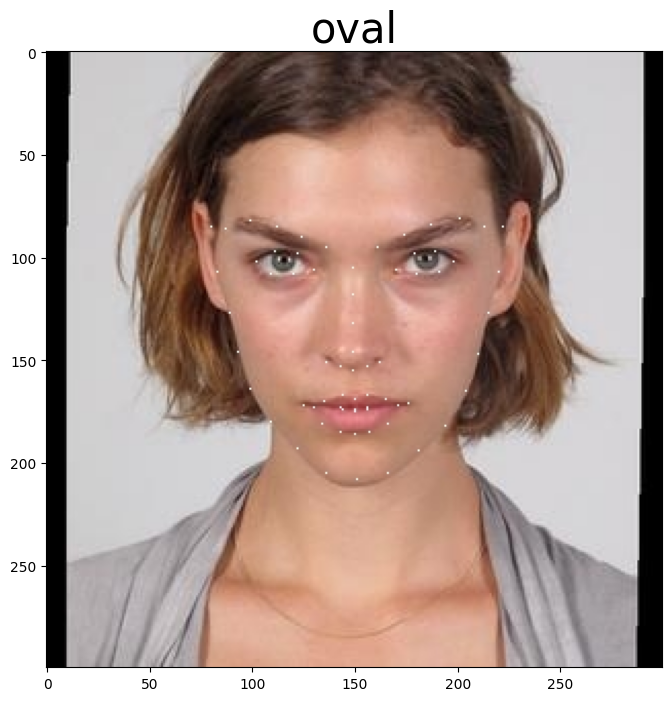

In [66]:
plt.figure(figsize = (8,8))
new_photo = my_photo+'_NEW_rotated_pts.jpg'
img = Image.open(new_photo)
draw = ImageDraw.Draw(img)
plt.title(test_shape[0], fontsize = 30)
plt.imshow(img)
img.close()

In [67]:
dfc.head()

0     1     2      3     4      5     6      7     8      9  ...  \
2035  80.0  85.0  83.0  107.0  89.0  127.0  93.0  146.0  99.0  164.0  ...   

            A14        A15       A16  Width      Height  H_W_Ratio  Jaw_width  \
2035  38.313091  34.339652  29.99508  142.0  180.044439   1.267919  59.008474   

      J_F_Ratio    MJ_width  MJ_J_width  
2035   0.415553  105.004762    1.779486  

[1 rows x 167 columns]

# Recommender

The recommender python file below contains the code for the recommender which uses as inputs: the face shape classified above, the user's desire for an up-do or not and their hair length.

It returns 6 images of hair styles recommended for their face shape.  The original selection is based on a random number score. However, the user can then provide feedback to the system that indicates their top and bottom preference.  This preference iterates back into the score by adding or removing points from the score.  If the user liked the style, this will increase the priority of the style for the next user and the opposite is true for the user's least favorite style.  This is a rudimentary system but utilized as a basic concept.

The recommender images are a subset of the images I used to train the model.  I reduced to a subset to remove having too many of the same hairstyles, especially from the same celebrity as well as very outdated hair style.

In [68]:
%run -i recommender.py

<Figure size 640x480 with 0 Axes>

Hello, alice.
Short
oval


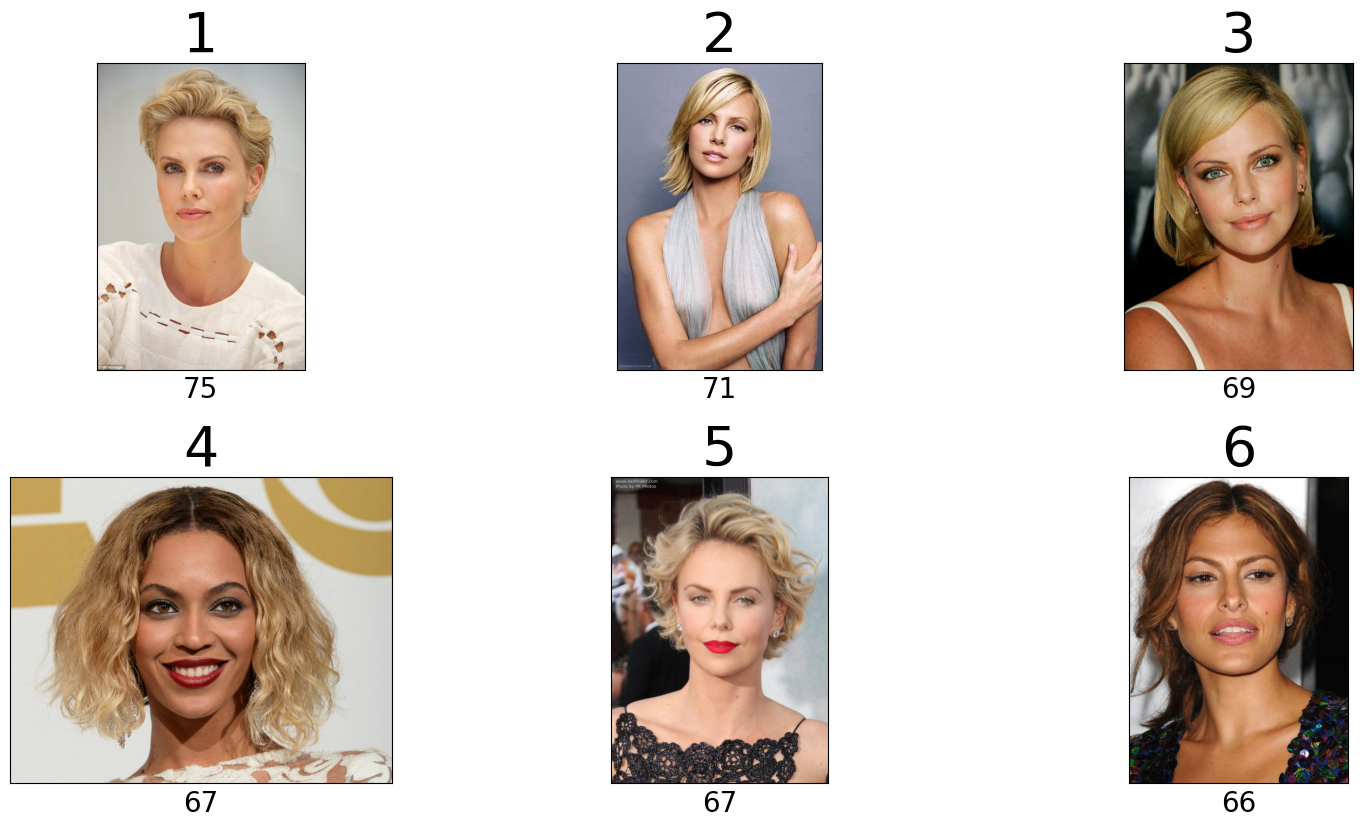

In [69]:
run_recommender(test_shape[0])

Hello, bob.
Short
oval


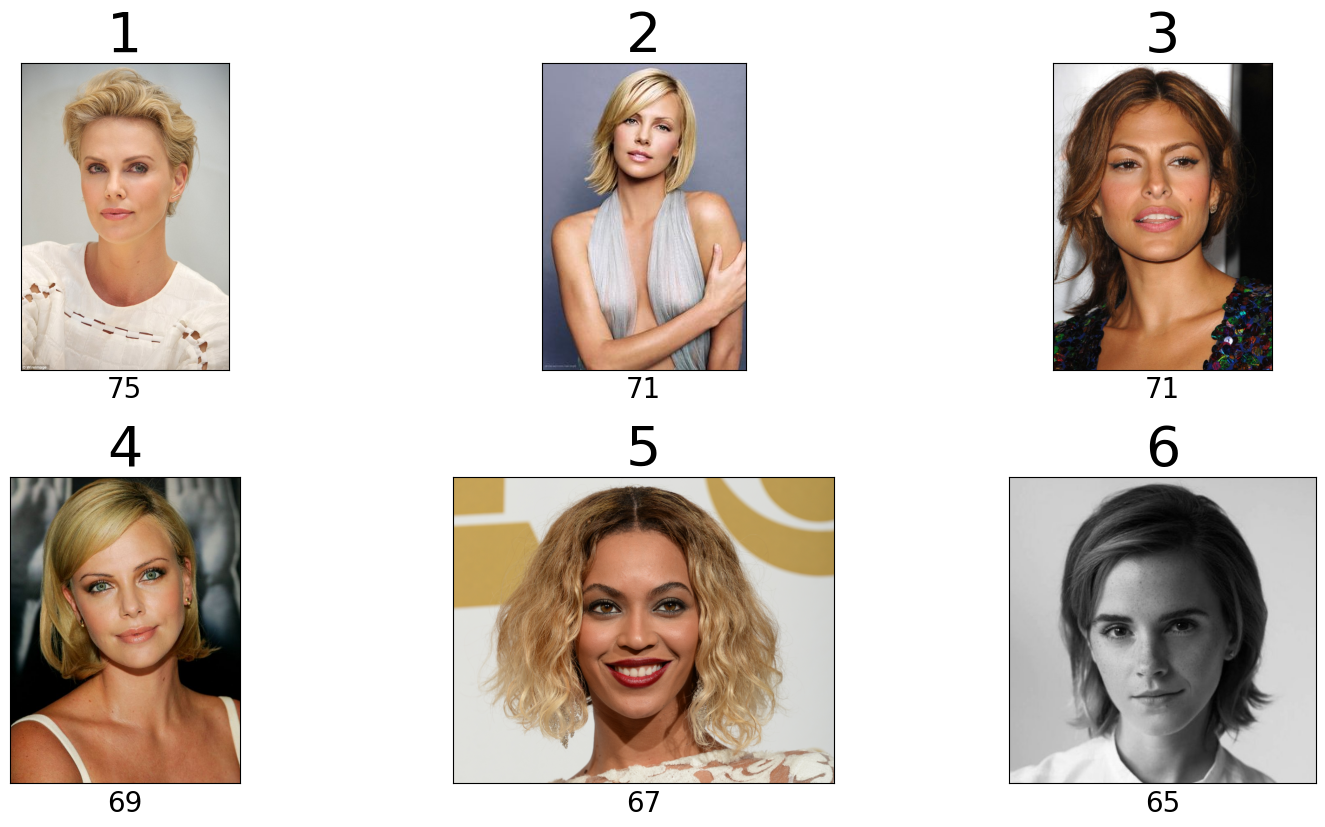

In [70]:
run_recommender(test_shape[0])

Hello, uiy.
Long
round


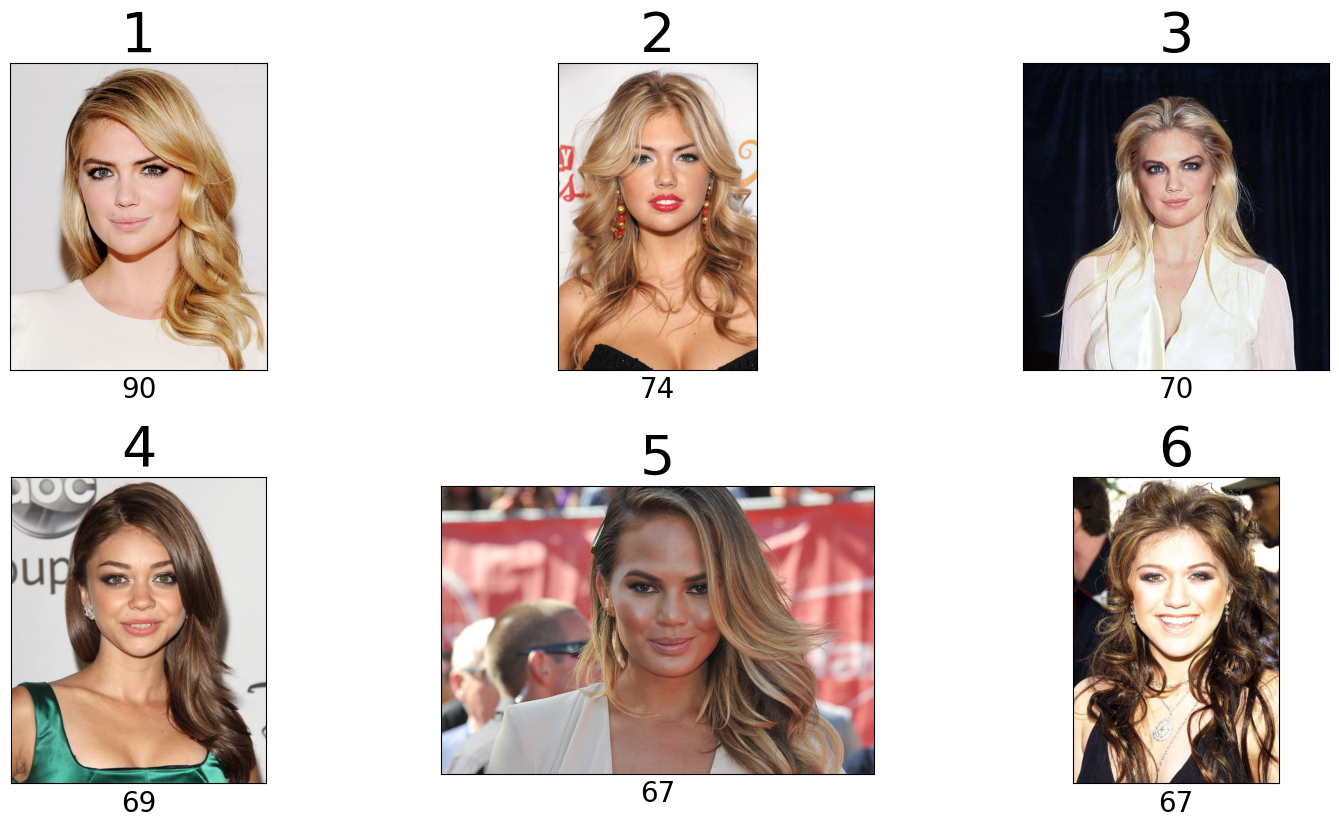

In [57]:
run_recommender(test_shape[0])


['square']


0      1     2      3     4      5     6      7     8      9  ...  \
2035  83.0  104.0  84.0  123.0  86.0  141.0  90.0  158.0  96.0  175.0  ...   

       A14        A15       A16       Width      Height  H_W_Ratio  Jaw_width  \
2035  45.0  39.322583  33.92345  147.003401  202.089089   1.374724  74.027022   

      J_F_Ratio    MJ_width  MJ_J_width  
2035   0.503574  124.064499    1.675935  

[1 rows x 167 columns]

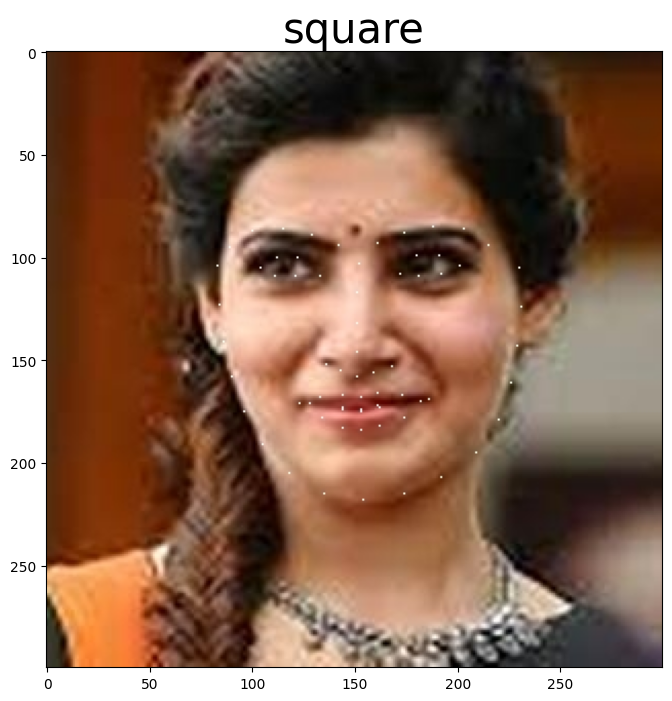

In [84]:
my_photo = 'samantha.jpeg'
file_num = 2035
make_face_df_save(my_photo,file_num,df)

#scaler = StandardScaler()  
dfc = df
test_row = dfc.loc[file_num].values.reshape(1,-1)
test_row = scaler.transform(test_row)  
test_shape = best_mlp.predict(test_row)
print(test_shape)

plt.figure(figsize = (8,8))
new_photo = my_photo+'_NEW_rotated_pts.jpg'
img = Image.open(new_photo)
draw = ImageDraw.Draw(img)
plt.title(test_shape[0], fontsize = 30)
plt.imshow(img)
img.close()

dfc.head()

Hello, samantha.
Long
square


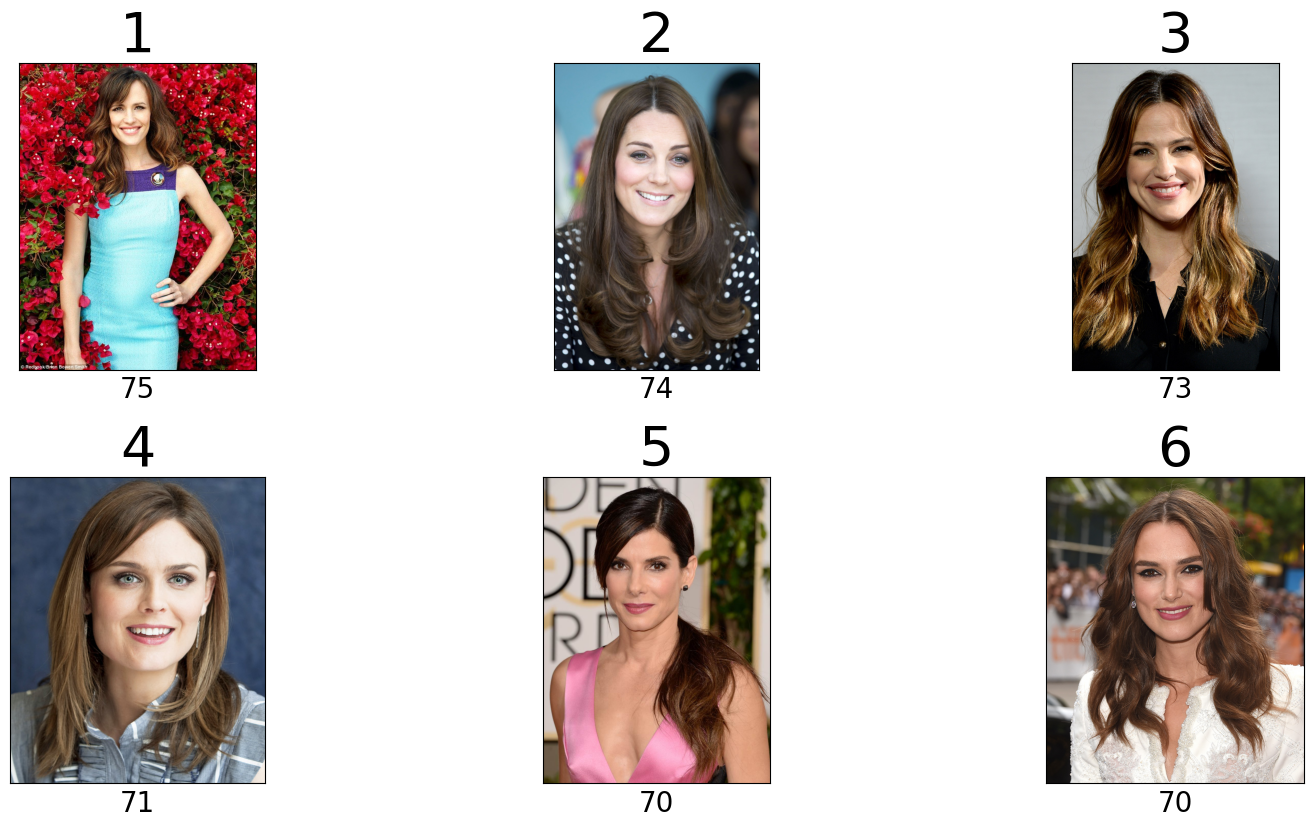

In [80]:
run_recommender(test_shape[0])

Hello, samntha.
Long
square


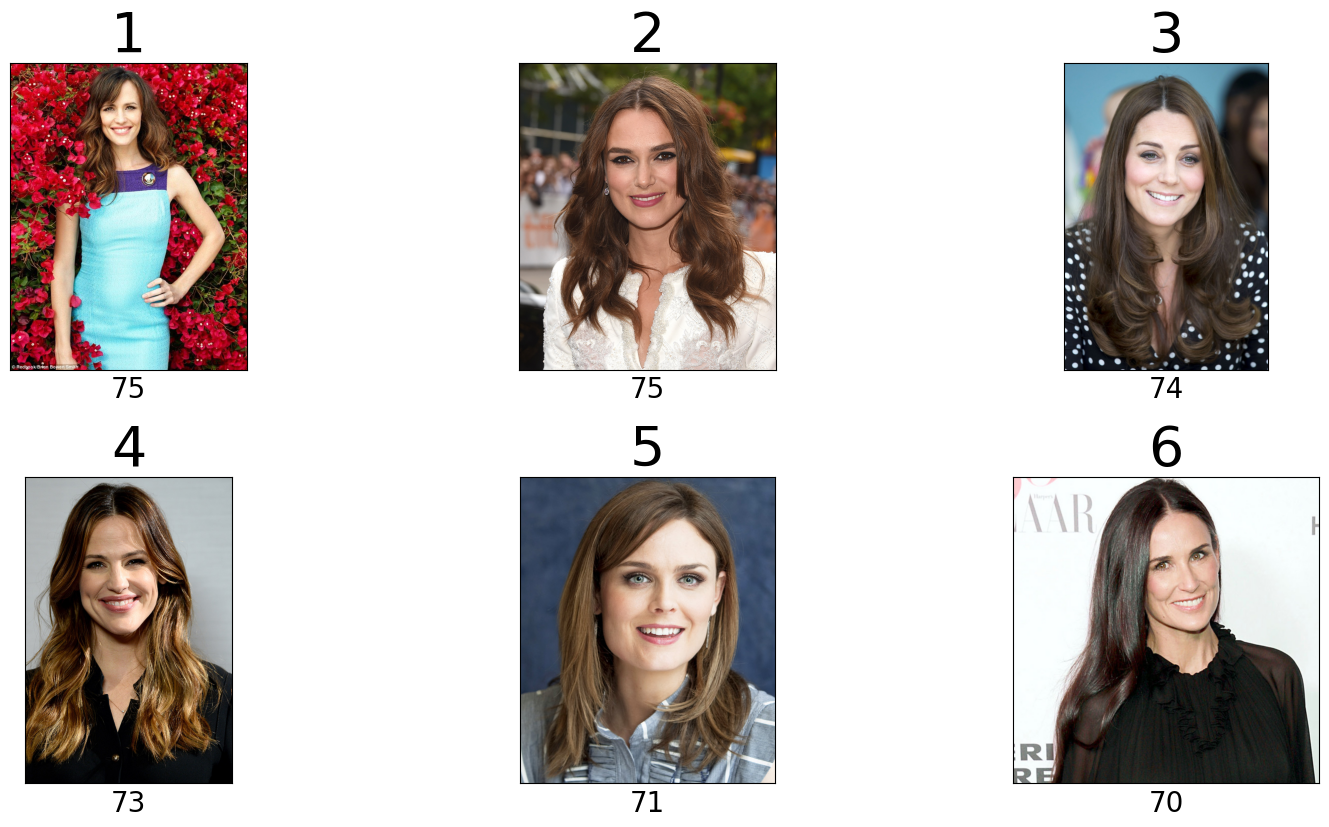

In [81]:
run_recommender(test_shape[0])

Hello, sam.
Long
square


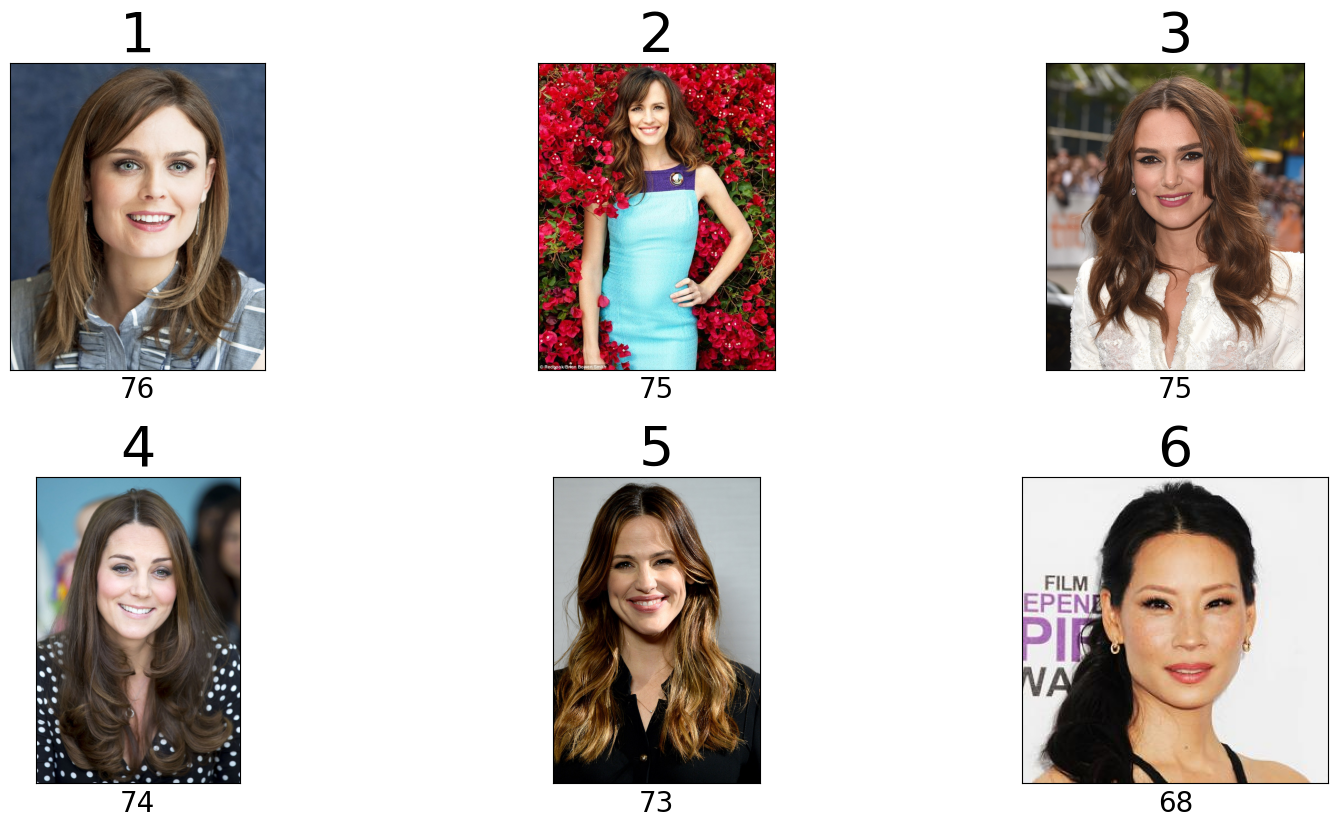

In [82]:
run_recommender(test_shape[0])